In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("csv/detectors.csv")
data.head(5)

,geometry_id,volume_id,boundary_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,...,rot_zv,rot_zw,bounds_type,bound_param0,bound_param1,bound_param2,bound_param3,bound_param4,bound_param5,bound_param6
0,144115256795332608,2,0,1,0,0.0,0.0,0.00000,1.0,0.0,...,0.0,1.0,1,11.300000,4001.0,3.141593,0,0,0,-1
1,144115325514809344,2,0,2,0,0.0,0.0,0.00000,1.0,0.0,...,0.0,1.0,1,24.000000,4001.0,3.141593,0,0,0,-1
2,144115394234286080,2,0,3,0,0.0,0.0,0.00000,1.0,0.0,...,0.0,1.0,1,27.662121,4001.0,3.141593,0,0,0,-1
3,288230444871188480,4,0,1,0,0.0,0.0,-3760.89062,1.0,0.0,...,0.0,1.0,3,29.924244,1202.0,3.141593,0,-1,-1,-1
4,288230513590665216,4,0,2,0,0.0,0.0,-3519.28125,1.0,0.0,...,0.0,1.0,3,29.924244,1202.0,3.141593,0,-1,-1,-1


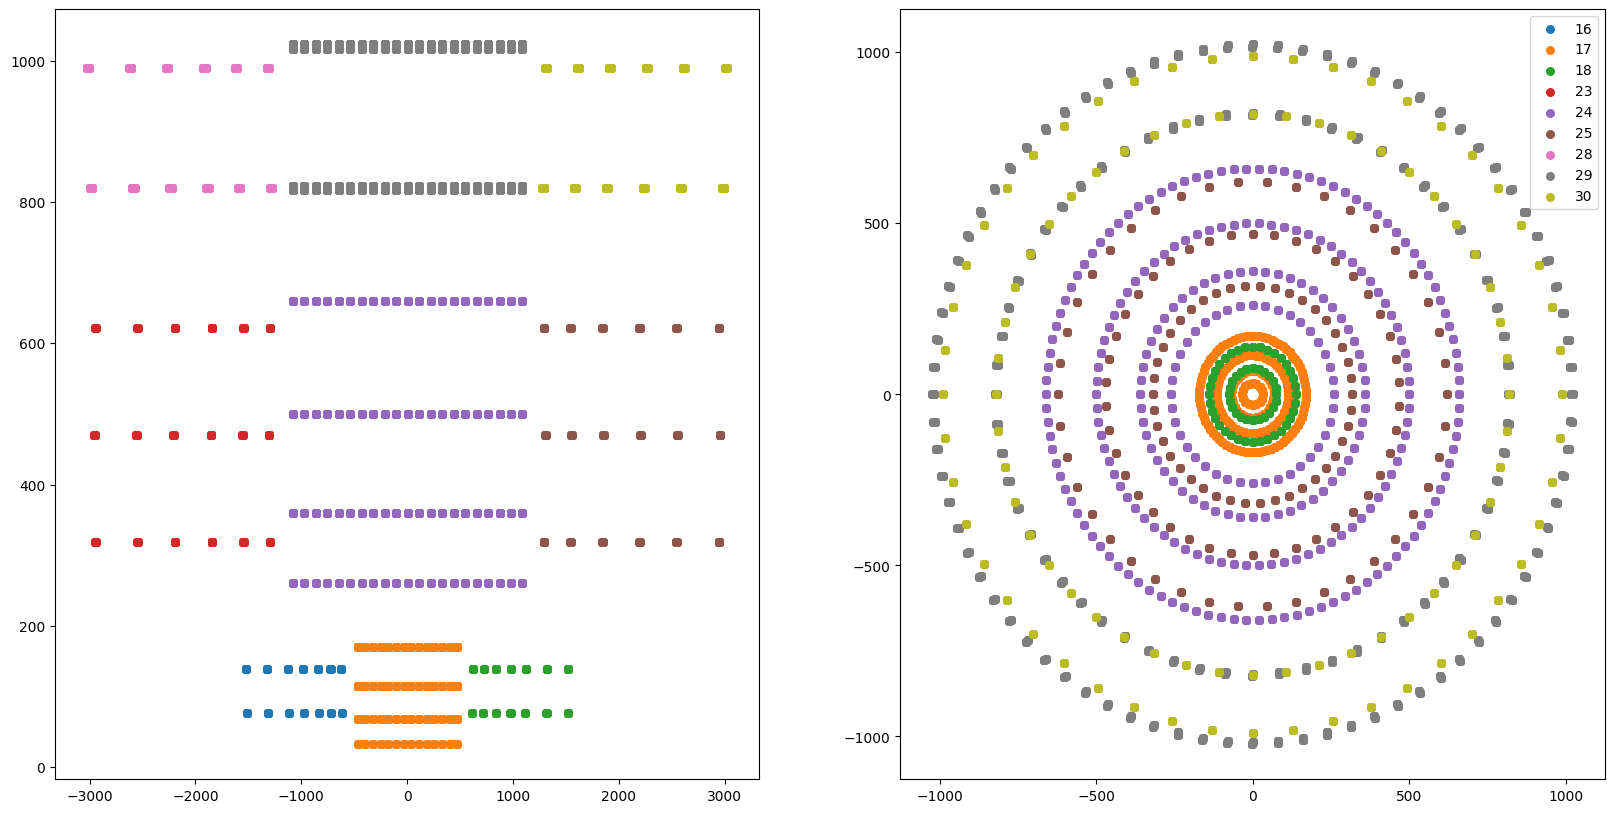

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

for vid in np.unique(data.volume_id):
    points = data[ data.volume_id == vid ][["cx","cy","cz"]].to_numpy()
    mask = np.logical_not(np.logical_and((points[:,0] == 0.0), (points[:,1] == 0.0)))
    points = points[mask]
    
    if len(points) == 0:
       continue
    
    r = np.hypot(points[:,0], points[:,1])
    
    ax[0].scatter(points[:,2], r, label=str(vid), s=30)
    ax[1].scatter(points[:,0], points[:,1], label=str(vid), s=30)
    
plt.legend()